In [1]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make("MiniGrid-DoorKey-5x5-v0")
env.seed(42)
env.env.max_steps = 200  # max_steps 수동 설정


In [3]:
class SARSA:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.1
        self.gamma = 0.9
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)
        self.valid_actions = [0, 1, 2, 3, 5]  # drop(action=4) 제외

    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]

    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        q_value = self.q_values[state][action]
        next_q_value = self.q_values[next_state][next_action]
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] += self.alpha * td_error

    def act(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.valid_actions)  # 탐험: drop 제거
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            masked_q = np.array(q_values)
            masked_q[4] = -np.inf  # 활용: drop 제거
            return int(np.argmax(masked_q))


In [4]:
from utils import gen_wrapped_env, show_video

In [5]:
# # 0: RIGHT, 1: DOWN, 2: LEFT, 3: UP
# def convert_to_minigrid_actions(current_dir, target_dir):
#     delta = (target_dir - current_dir) % 4
#     if delta == 0:
#         return [2]  # move forward
#     elif delta == 1:
#         return [1, 2]  # right, forward
#     elif delta == 2:
#         return [1, 1, 2]  # 180 turn, forward
#     elif delta == 3:
#         return [0, 2]  # left, forward

env = gen_wrapped_env('MiniGrid-DoorKey-5x5-v0')
agent = SARSA(actions=6, agent_indicator=10) 

rewards = []
success = 0
episodes = 500000

for ep in range(episodes):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()



episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0
episode: 180, rewards: 0
episode: 200, rewards: 0
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0
episode: 300, rewards: 0
episode: 320, rewards: 0
episode: 340, rewards: 0
episode: 360, rewards: 0
episode: 380, rewards: 0
episode: 400, rewards: 0
episode: 420, rewards: 0
episode: 440, rewards: 0
episode: 460, rewards: 0
episode: 480, rewards: 0
episode: 500, rewards: 0
episode: 520, rewards: 0
episode: 540, rewards: 0
episode: 560, rewards: 0
episode: 580, rewards: 0
episode: 600, rewards: 0
episode: 620, rewards: 0
episode: 640, rewards: 0
episode: 660, rewards: 0
episode: 680, rewards: 0
episode: 700, rewards: 0
episode: 720, rewards: 0
episode: 740, rewards: 0
episode: 760, rewards: 0
episode: 780, rewards: 0
episode: 800, rewards: 0
epis

In [6]:
# rewards = []
# success = 0
# episodes = 100000

# for ep in range(episodes):
#     obs = env.reset()
#     done = False
#     total_reward = 0

#     while not done:
#         action = agent.act(obs)
#         next_obs, reward, done, info = env.step(action)
#         agent.update(obs, action, reward, next_obs)
#         obs = next_obs
#         total_reward += reward

#     rewards.append(total_reward)
#     if total_reward >= 0.9:  # 성공 판정 강화
#         success += 1

#     if (ep + 1) % 20 == 0:
#         print("episode: {}, reward: {:.2f}".format(ep+1, total_reward))

# env.close()


In [7]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{6: [5e-05, 5e-05, 6e-05, 5e-05, 0.0, 5e-05],
 0: [6e-05, 6e-05, 7e-05, 6e-05, 0.0, 6e-05],
 3: [0.00012, 0.00012, 0.00012, 0.00012, 0.0, 0.00012],
 12: [0.02236, 0.0217, 0.05656, 0.02229, 0.0, 0.02197],
 9: [0.00434, 0.00436, 0.00723, 0.00432, 0.0, 0.00436],
 21: [0.04523, 0.04074, 0.06324, 0.04258, 0.0, 0.0482],
 24: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 18: [0.00728, 0.00675, 0.00896, 0.00725, 0.0, 0.00616]}

In [8]:
show_video()

In [9]:
import os
os.makedirs("./logs", exist_ok=True)

pd.Series(rewards).to_csv('./logs/rewards_sarsa_door_v2.csv')


In [10]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa_door_v2.csv', index_col=False).iloc[:, 1]
# q_logs = pd.read_csv('./logs/rewards_qlearning.csv', index_col=False).iloc[:, 1]

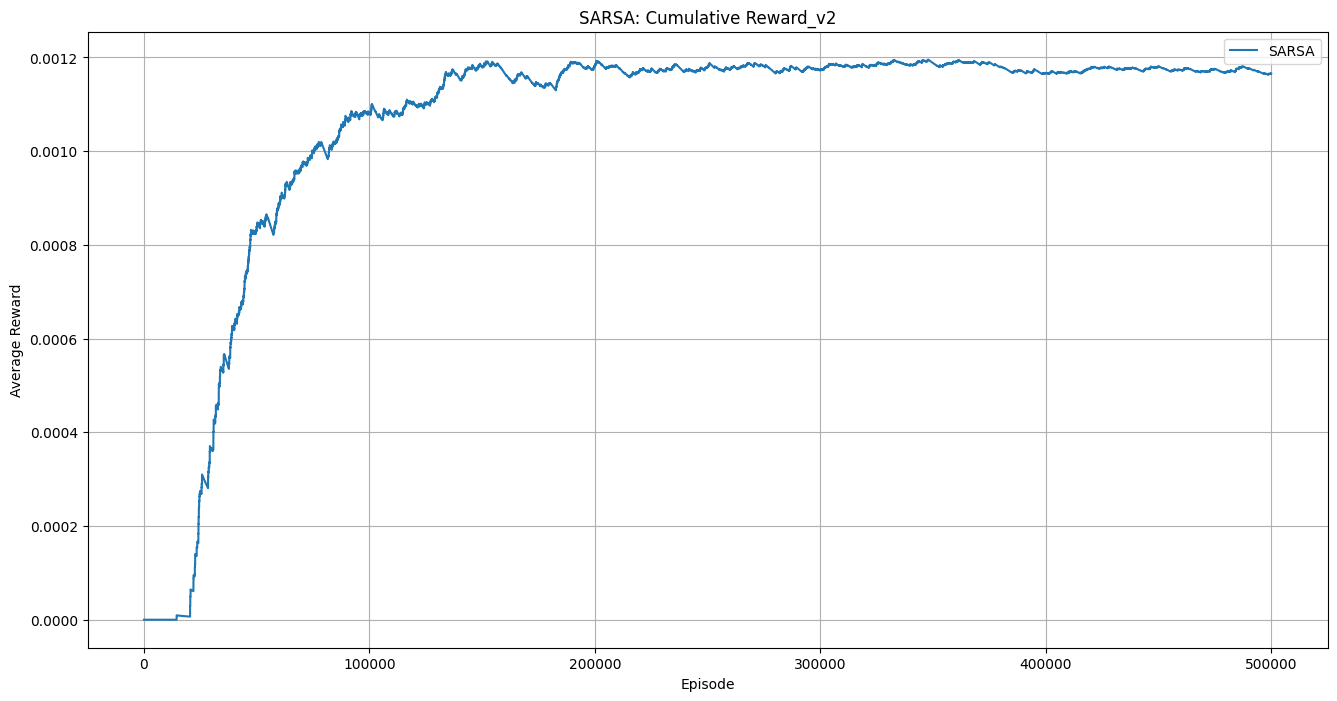

In [11]:
plt.figure(figsize=(16, 8))
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0])) + 1), label="SARSA")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("SARSA: Cumulative Reward_v2")
plt.legend()
plt.grid(True)
plt.savefig("sarsa_door.jpg", dpi=300, bbox_inches='tight')
plt.show() 
